In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
plt.style.available
plt.style.use(['fivethirtyeight'])

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8360 entries, 0 to 8359
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      8360 non-null   object 
 1   CPU       8360 non-null   float64
 2   memory    8360 non-null   float64
 3   cpu_temp  8354 non-null   float64
 4   output    8360 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 326.7+ KB


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

time        0
CPU         0
memory      0
cpu_temp    0
output      0
dtype: int64

In [13]:
df.columns

Index(['time', 'CPU', 'memory', 'cpu_temp', 'output'], dtype='object')

<AxesSubplot:xlabel='CPU', ylabel='memory'>

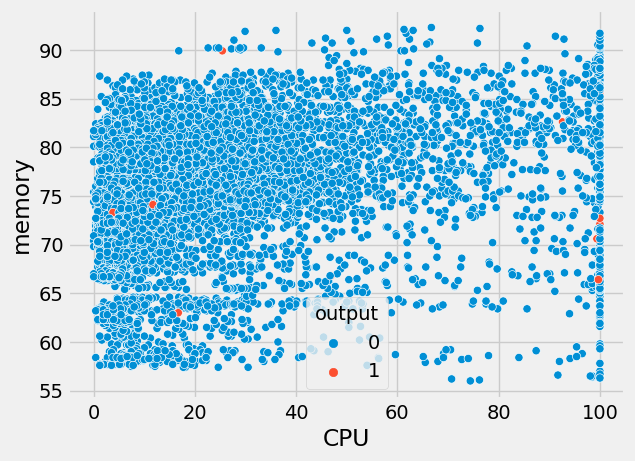

In [18]:
sns.scatterplot(x = df['CPU'], y = df['memory'], hue=df['output'])

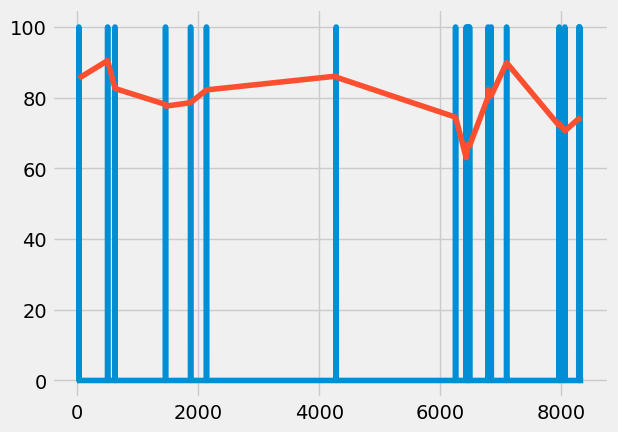

In [35]:
dt = 50
a =0
failures = df['output'] == 1
plt.plot(100*df['output'])
plt.plot(df['memory'][failures])
df['memory'][failures]
plt.plot(df['memory'][failures])

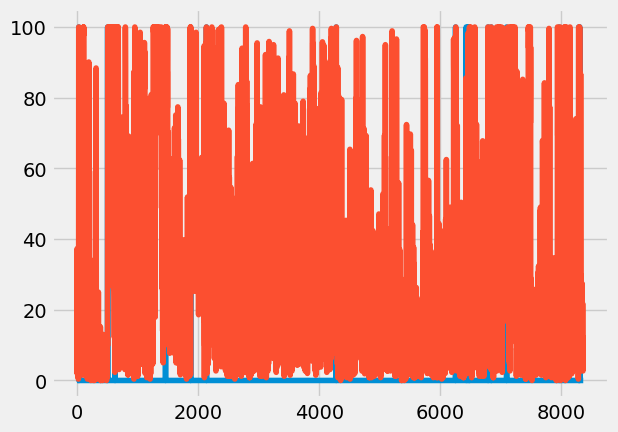

In [26]:
dt = 50
not_failures = df['output'] == 0
plt.plot(100*df['output'])
plt.plot(df['CPU'][not_failures])